<a href="https://colab.research.google.com/github/lewinantao/Face_mask_detection/blob/master/Data_Augmentation_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing the required packages

In [ ]:
import cv2
import os
import glob

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array, load_img

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

### Mounting Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Setting the folder locations

In [ ]:
base_dir = '/content/drive/MyDrive/Deep_Learning/Face_Mask_Detection/FaceMaskDetectionDataset'
image_dir = os.path.join(base_dir, 'images/')
annot_dir = os.path.join(base_dir,'annotations/')

In [ ]:
print('Image Path:     ',image_dir)
print('Annotation Path:',annot_dir)

Image Path:      /content/drive/MyDrive/Deep_Learning/Face_Mask_Detection/FaceMaskDetectionDataset/images/
Annotation Path: /content/drive/MyDrive/Deep_Learning/Face_Mask_Detection/FaceMaskDetectionDataset/annotations/


In [ ]:
train_dir = os.path.join(base_dir, 'train_images/')
print('Train  Image Folder:',train_dir)

Train  Image Folder: /content/drive/MyDrive/Deep_Learning/Face_Mask_Detection/FaceMaskDetectionDataset/train_images/


In [ ]:
aug_incorrectmask_folder = os.path.join(base_dir,'aug_sample_incorrectmask/')
aug_withoutmask_folder = os.path.join(base_dir,'aug_sample_withoutmask/')
aug_withmask_folder = os.path.join(base_dir,'aug_sample_withmask/')


In [ ]:
print('Data Augmented Incorrect Mask Folder :',aug_incorrectmask_folder)
print('Data Augmented Without Mask Folder   :',aug_withoutmask_folder)
print('Data Augmented With Mask Folder      :',aug_withmask_folder)

Data Augmented Incorrect Mask Folder : /content/drive/MyDrive/Deep_Learning/Face_Mask_Detection/FaceMaskDetectionDataset/aug_sample_incorrectmask/
Data Augmented Without Mask Folder   : /content/drive/MyDrive/Deep_Learning/Face_Mask_Detection/FaceMaskDetectionDataset/aug_sample_withoutmask/
Data Augmented With Mask Folder      : /content/drive/MyDrive/Deep_Learning/Face_Mask_Detection/FaceMaskDetectionDataset/aug_sample_withmask/


### Data Augmentation Code 

In [ ]:
def data_aug (save_to_dir , image_name):

  datagen = ImageDataGenerator(
      rotation_range=40,          # rotate the image 40 degrees
      width_shift_range = 0.2,    # Shift the pic width by a max of 20%
      height_shift_range = 0.2,   # Shift the pic height by a max of 20%
      shear_range = 0.2,          # Shear means cutting away part of the image (max 20%)
      zoom_range = 0.2,           # Zoom  the image in by 20% max
      horizontal_flip = True,     # Flipping the image  horizontally 
      fill_mode = "nearest"       # Fill in missing pixels with the nearest filled value
  )

  if not os.path.exists(save_to_dir):
      os.makedirs(save_to_dir)    

  # Loading a sample image 
  img = load_img(os.path.join(train_dir,image_name)) 
  # Converting the input sample image to an array
  x = img_to_array(img)
  # Reshaping the input image
  x = x.reshape((1, ) + x.shape) 
    
  # Generating and saving 5 augmented samples 
  # using the above defined parameters. 
  i = 0
  for batch in datagen.flow(x, batch_size = 1,
                            save_to_dir =save_to_dir, 
                            save_prefix ='image_', save_format ='jpeg'):
      i += 1
      if i > 5:
          break

In [ ]:
# Data Augmentation For Incorrect Mask Image
# Selecting a sample image from the train dataset
image_name='200.png' 
save_to_dir=aug_incorrectmask_folder
data_aug(save_to_dir , image_name)

In [ ]:
# Data Augmentation For without Mask Image
# Selecting a sample image from the train dataset
image_name='417.png'
save_to_dir=aug_withoutmask_folder
data_aug(save_to_dir , image_name)

In [ ]:
# Data Augmentation For with Mask Image
# Selecting a sample image from the train dataset
image_name='309.png'
save_to_dir=aug_withmask_folder
data_aug(save_to_dir , image_name)

### Plotting the images for Incorrect Mask Images

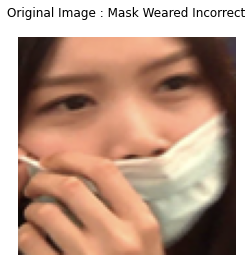

In [ ]:
# Original Image
img = load_img(os.path.join(train_dir,'200.png')) 

plt.figure(figsize=(4,4))     # specifying the size of image to be printed
plt.imshow(img)               # printing the image
plt.axis('off')
plt.title('Original Image : Mask Weared Incorrect\n')
plt.show()


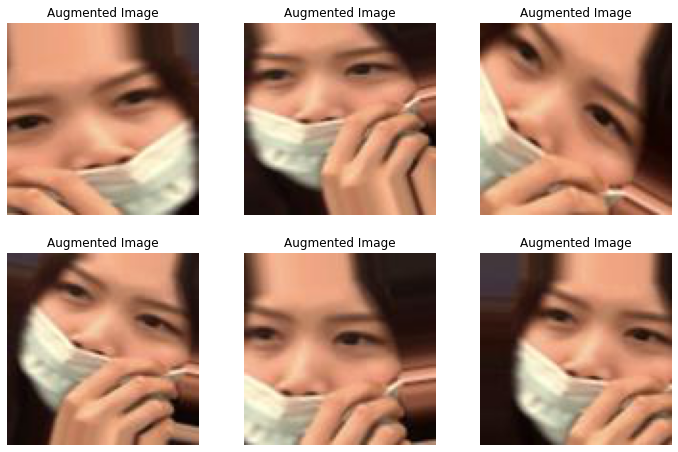

In [ ]:
# Plotting the data augmented images
images = []
for img_path in glob.glob( os.path.join(aug_incorrectmask_folder,'*.jpeg')):

    images.append(mpimg.imread(img_path))

# (width,height)
plt.figure(figsize=(12,12))

columns = 3

for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    #plt.xticks([])
    #plt.yticks([])
    plt.axis('off')
    plt.title('Augmented Image')


### Plotting the images for without Mask Images

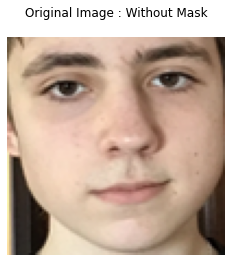

In [ ]:
# Original Image 
img = load_img(os.path.join(train_dir,'417.png')) 

plt.figure(figsize=(4,4))     #specifying the size of image to be printed
plt.imshow(img)               # printing the image
plt.axis('off')
plt.title('Original Image : Without Mask\n')
plt.show()

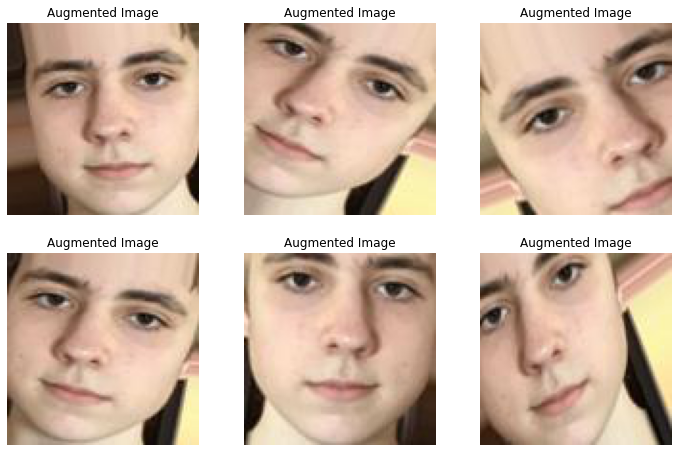

In [ ]:
# Plotting the data augmented images
images = []
for img_path in glob.glob( os.path.join(aug_withoutmask_folder,'*.jpeg')):

    images.append(mpimg.imread(img_path))

plt.figure(figsize=(12,12))
columns = 3

for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('Augmented Image')

### Plotting the images for with Mask Images

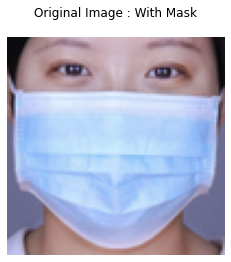

In [ ]:
# Original Image 
img = load_img(os.path.join(train_dir,'309.png')) 

plt.figure(figsize=(4,4))    #specifying the size of image to be printed
plt.imshow(img)              # printing the image
plt.axis('off')
plt.title('Original Image : With Mask\n')
plt.show()

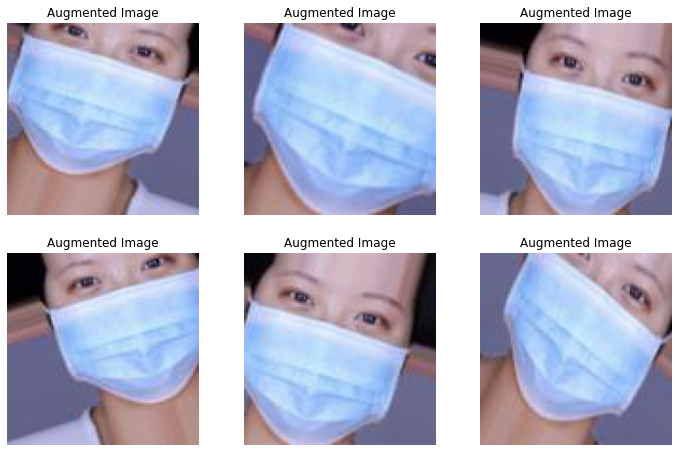

In [ ]:
# Plotting the data augmented images
images = []
for img_path in glob.glob( os.path.join(aug_withmask_folder,'*.jpeg')):

    images.append(mpimg.imread(img_path))

plt.figure(figsize=(12,12))
columns = 3


for i, image in enumerate(images):
    plt.subplot(len(images) / columns + 1, columns, i + 1)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title('Augmented Image')